# 検量線と還元糖濃度, 酵素分解率

## 検量線と還元糖濃度

回帰係数 = [[0.6694177]]
切片 = [0.01654654]
決定係数 = 0.998235667781501


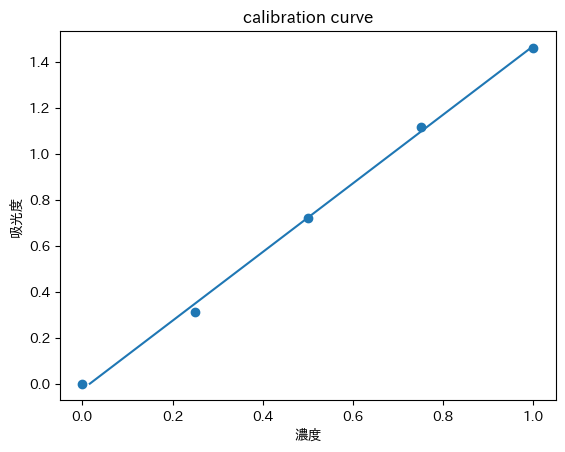

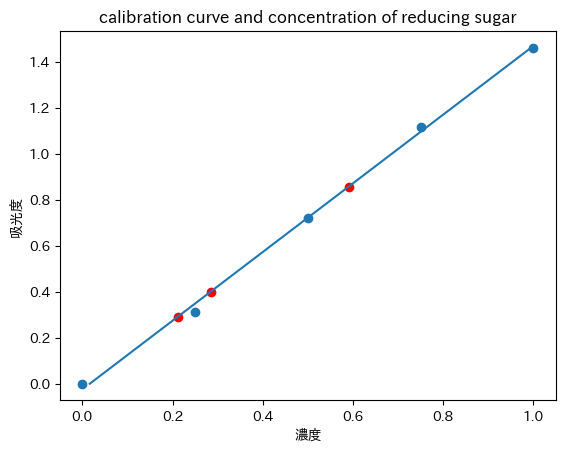

溶液中の還元糖濃度[mg/mL] = [[0.21201651 0.28498304 0.59090692]]
溶液の吸光度　= [[0.292 0.401 0.858]]


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn import linear_model

#calibration------------------------------------------------------------------------------------------
X = np.arange(0, 1.25, 0.25).reshape(-1, 1) #concentration
Y = np.array([0.201, 0.512, 0.924, 1.316, 1.663]).reshape(-1, 1) - 0.201 #absorbance

model = linear_model.LinearRegression()
model.fit(Y, X) #to predict concentration from absorbance
predicted_X = model.predict(Y) #predict concentration from absorbance
print("回帰係数 =", model.coef_)
print("切片 =", model.intercept_)
print("決定係数 =", model.score(Y, X))

plt.scatter(X, Y)
plt.plot(predicted_X, Y)
plt.title("calibration curve")
plt.xlabel("濃度")
plt.ylabel("吸光度")
plt.show()

#predict concentation from absorbance-----------------------------------------------------------------
time = np.array([0, 2, 24]).reshape(-1, 1)
absorbance = np.array([0.527, 0.636, 1.093]).reshape(-1, 1) - 0.235
predicted_concentration = model.predict(absorbance)

#plot calibration curve
plt.scatter(X, Y)
plt.plot(predicted_X, Y)
plt.title("calibration curve and concentration of reducing sugar")
plt.xlabel("濃度")
plt.ylabel("吸光度")

#plot predicted value
plt.scatter(predicted_concentration, absorbance, c="red")
plt.show()

print("溶液中の還元糖濃度[mg/mL] =", predicted_concentration.reshape(1, -1))
print("溶液の吸光度　=", absorbance.reshape(1, -1))

## 還元糖濃度を用いた酵素分解率の計算

In [33]:
import numpy as np

sugar_conc = np.array([0.4120304, 0.5745712, 1.2560496])
W_d = np.array([0.2517, 0.2548, 0.2493])
M_b = (predicted_concentration.reshape(1, -1) * 30 * 1e-3) / 180
M_s = W_d / 241

decomp_rate = (M_b / M_s) * 100
print("酵素分解率[%] =", decomp_rate)

酵素分解率[%] = [[3.38339149 4.49247199 9.52056214]]
